# Standardizing and Scripting

## 특성 스케일

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn import preprocessing

# 특성을 만듭니다.
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

# 스케일러 객체를 만듭니다.
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# 특성의 스케일을 변환합니다.
scaled_feature = minmax_scale.fit_transform(feature)

# 특성을 출력합니다.
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [2]:
# 훈련 세트를 변환합니다.
preprocessing.MinMaxScaler().fit_transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [3]:
# 테스트 세트를 변환합니다.
preprocessing.MinMaxScaler().fit_transform(feature[3:])

array([[0.],
       [1.]])

In [4]:
# 훈련 세트로 변환기를 학습합니다.
scaler = preprocessing.MinMaxScaler().fit(feature[:3])
scaler.transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [5]:
# 훈련 세트에서 학습한 변환기로 테스트 세트를 변환합니다.
scaler.transform(feature[3:])

array([[1.2],
       [2.8]])

## 특성 표준화

In [6]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn import preprocessing

# 특성을 만듭니다.
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

# 변환기 객체를 만듭니다.
scaler = preprocessing.StandardScaler()

# 특성을 변환합니다.
standardized = scaler.fit_transform(x)

# 특성을 출력합니다.
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [7]:
# 평균과 표준 편차를 출력합니다.
print("평균 Mean:", round(standardized.mean()))
print("표준 편차 Standard deviation:", standardized.std())

평균 Mean: 0
표준 편차 Standard deviation: 1.0


In [8]:
# 변환기 객체를 만듭니다.
robust_scaler = preprocessing.RobustScaler()

# 특성을 변환합니다.
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

In [9]:
interquatile_range = x[3] - x[1]
(x - np.median(x)) / interquatile_range

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

In [10]:
preprocessing.QuantileTransformer().fit_transform(x)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

## 특성 정규화

In [11]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Normalizer

# 특성 행렬을 만듭니다.
features = np.array([[0.5, 0.5],
                     [1.1, 3.4],
                     [1.5, 20.2],
                     [1.63, 34.4],
                     [10.9, 3.3]])

# 변환기 객체를 만듭니다.
normalizer = Normalizer(norm="l2")

# 특성 행렬을 변환합니다.
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [12]:
# 특성 행렬을 변환합니다.
features_l2_norm = Normalizer(norm="l2").transform(features)

# 특성 행렬을 출력합니다.
features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [13]:
# 특성 행렬을 변환합니다.
features_l1_norm = Normalizer(norm="l1").transform(features)

# 특성 행렬을 출력합니다.
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [14]:
# 합을 출력합니다.
print("첫 번째 샘플 값의 합:",
   features_l1_norm[0, 0] + features_l1_norm[0, 1])

첫 번째 샘플 값의 합: 1.0


In [15]:
# L1 노름을 사용한 변환.
# 각 행(axis=1)을 합한 결과가 2차원 배열로 유지되도록 keepdims를 True로 설정합니다.
features / np.sum(np.abs(features), axis=1, keepdims=True)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [16]:
# L2 노름을 사용한 변환.
features / np.sqrt(np.sum(np.square(features), axis=1, keepdims=True))

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [17]:
# 각 행에서 최댓값으로 나눕니다.
Normalizer(norm="max").transform(features)

array([[1.        , 1.        ],
       [0.32352941, 1.        ],
       [0.07425743, 1.        ],
       [0.04738372, 1.        ],
       [1.        , 0.30275229]])

### 다항 특성과 교차항 특성 생성하기

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# PolynomialFeatures 객체를 만듭니다.
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

# 다항 특성을 만듭니다.
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [19]:
interaction = PolynomialFeatures(degree=2, 
                                 interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

In [20]:
# 상수항 1을 추가합니다.
polynomial_bias = PolynomialFeatures(degree=2, include_bias=True).fit(features)
polynomial_bias.transform(features)

array([[1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.]])

In [21]:
polynomial_bias.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

### 하나 이상의 특성에 사용자 정의 변환을 적용

In [22]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# 간단한 함수를 정의합니다.
def add_ten(x):
    return x + 10

# 변환기 객체를 만듭니다.
ten_transformer = FunctionTransformer(add_ten)

# 특성 행렬을 변환합니다.
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [23]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# 함수를 적용합니다.
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,12,13
2,12,13


In [24]:
FunctionTransformer(add_ten, validate=False).transform(np.array([1, 2, 3]))

array([11, 12, 13])

In [25]:
from sklearn.compose import ColumnTransformer

# 100을 더하는 함수를 만듭니다.
def add_hundred(x):
    return x + 100

# (이름, 변환기, 열 리스트)로 구성된 튜플의 리스트를 ColumnTransformer에 전달합니다.
ct = ColumnTransformer(
    [("add_ten", FunctionTransformer(add_ten, validate=True), ['feature_1']),
     ("add_hundred", FunctionTransformer(add_hundred, validate=True), ['feature_2'])])

ct.fit_transform(df)

array([[ 12, 103],
       [ 12, 103],
       [ 12, 103]])

## 이상치 다루기

In [26]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# 모의 데이터를 만듭니다.
features, _ = make_blobs(n_samples = 10,
                         n_features = 2,
                         centers = 1,
                         random_state = 1)

# 첫 번째 샘플을 극단적인 값으로 바꿉니다.
features[0,0] = 10000
features[0,1] = 10000

# 이상치 감지 객체를 만듭니다.
outlier_detector = EllipticEnvelope(contamination=.1)

# 감지 객체를 훈련합니다.
outlier_detector.fit(features)

# 이상치를 예측합니다.
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [27]:
# 하나의 특성을 만듭니다.
feature = features[:,0]

# 이상치의 인덱스를 반환하는 함수를 만듭니다.
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

# 함수를 실행합니다.
indicies_of_outliers(feature)

(array([0]),)

In [28]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# 샘플을 필터링합니다.
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [29]:
# 라이브러리를 임포트합니다.
import numpy as np

# 불리언 조건을 기반으로 특성을 만듭니다.
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)

# 데이터를 확인합니다.
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [30]:
# 로그 특성
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]

# 데이터를 확인합니다.
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


In [31]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Binarizer

# 특성을 만듭니다.
age = np.array([[6],
                [12],
                [20],
                [36],
                [65]])

# Binarizer 객체를 만듭니다.
binarizer = Binarizer(threshold=18)

# 특성을 변환합니다.
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [32]:
# 특성을 나눕니다.
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [33]:
# 특성을 나눕니다.
np.digitize(age, bins=[20,30,64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]])

In [34]:
# 특성을 나눕니다.
np.digitize(age, bins=[18])

array([[0],
       [0],
       [1],
       [1],
       [1]])

## 누락된 값 다루기

In [37]:
# 라이브러리를 임포트합니다.
import numpy as np

# 특성 행렬을 만듭니다.
features = np.array([[1.1, 11.1],
                     [2.2, 22.2],
                     [3.3, 33.3],
                     [4.4, 44.4],
                     [np.nan, 55]])

# (~ 연산자를 사용하여) 누락된 값이 없는 샘플만 남깁니다.
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [38]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# 누락된 값이 있는 샘플을 제거합니다.
dataframe.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


In [2]:
# 라이브러리를 임포트합니다.
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 모의 특성 행렬을 만듭니다.
features, _ = make_blobs(n_samples = 1000,
                         n_features = 2,
                         random_state = 1)

# 특성을 표준화합니다.
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# 첫 번째 샘플의 첫 번째 특성을 삭제합니다.
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

# 특성 행렬에 있는 누락된 값을 예측합니다.
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)

# 실제 값과 대체된 값을 비교합니다.
print("실제 값:", true_value)
print("대체된 값:", features_knn_imputed[0,0])

실제 값: 0.8730186113995938
대체된 값: 1.0955332713113226


In [3]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer()
features_simple_imputed = simple_imputer.fit_transform(features)

# 실제 값과 대체된 값을 비교합니다.
print("실제 값 True Value:", true_value)
print("대체된 값 Imputed Value:", features_simple_imputed[0,0])

실제 값 True Value: 0.8730186113995938
대체된 값 Imputed Value: -3.058372724614996


## 데이터 전처리 연습

### 비지도학습에서 데이터 전처리

!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [5]:
# 데이터 전처리와 스케일 조정을 위한 데이터셋과 패키지 라이브러리 불러오기

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
# 스케일러 작업

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [8]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(X_test_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
스케일 조정 후 특성별 최소값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


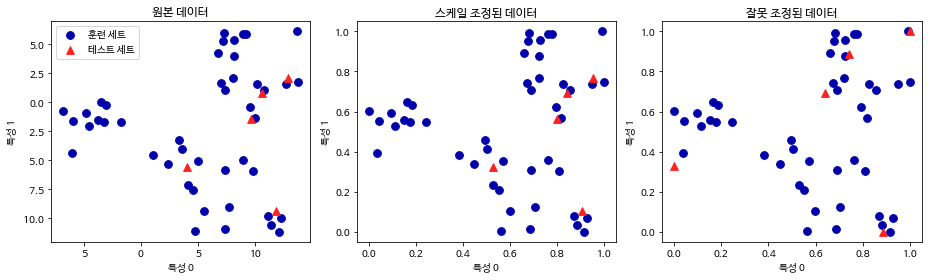

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [10]:
# NOTE fit_transform을 사용하여 한번에 변환하는 방법도 있습니다. (아래 코드 참고)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

### 지도 학습에서 데이터 전처리

In [12]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(gamma='auto', C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

# 테스트 세트 정확도: 0.63
# 스케일 조정된 테스트 세트의 정확도: 0.97

테스트 세트 정확도: 0.63
스케일 조정된 테스트 세트의 정확도: 0.97


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

##########데이터 로드

#hour, attendance, score
df = pd.DataFrame([
    [2, 1, 3],
    [3, 2, 5],
    [3, 4, 7],
    [5, 5, 10],
    [7, 5, 12],
    [2, 5, 7],
    [8, 9, 13],
    [9, 10, 13],
    [6, 12, 12],
    [9, 2, 13],
    [6, 10, 12],
    [2, 4, 6]
], columns=['hour', 'attendance', 'score'])

##########데이터 분석

##########데이터 전처리

x_data = df.drop(['score'], axis=1) 
y_data = df['score']

transformer = StandardScaler()
transformer.fit(x_data) #StandardScaler 모델에 x_train_df 데이터 적용 (평균, 표준편차 계산)
#print(transformer.mean_) #[5.16666667 5.75      ]
#print(transformer.var_) #[ 6.80555556 12.02083333]
#print(transformer.scale_) #[2.60874597 3.46710734]
x_data = transformer.transform(x_data)
print(x_data)

[[-1.21386547 -1.37001815]
 [-0.83053953 -1.08159328]
 [-0.83053953 -0.50474353]
 [-0.06388766 -0.21631866]
 [ 0.70276422 -0.21631866]
 [-1.21386547 -0.21631866]
 [ 1.08609016  0.93738084]
 [ 1.4694161   1.22580572]
 [ 0.31943828  1.80265546]
 [ 1.4694161  -1.08159328]
 [ 0.31943828  1.22580572]
 [-1.21386547 -0.50474353]]


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

##########데이터 로드

#hour, attendance
x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])

##########데이터 분석

##########데이터 전처리

transformer = StandardScaler()
transformer.fit(x_data) #StandardScaler 모델에 x_train_df 데이터 적용 (평균, 표준편차 계산)
#print(transformer.mean_) #[5.16666667 5.75      ]
#print(transformer.var_) #[ 6.80555556 12.02083333]
#print(transformer.scale_) #[2.60874597 3.46710734]
x_data = transformer.transform(x_data)
print(x_data)

[[-1.21386547 -1.37001815]
 [-0.83053953 -1.08159328]
 [-0.83053953 -0.50474353]
 [-0.06388766 -0.21631866]
 [ 0.70276422 -0.21631866]
 [-1.21386547 -0.21631866]
 [ 1.08609016  0.93738084]
 [ 1.4694161   1.22580572]
 [ 0.31943828  1.80265546]
 [ 1.4694161  -1.08159328]
 [ 0.31943828  1.22580572]
 [-1.21386547 -0.50474353]]


In [15]:
##########데이터 전처리

from sklearn.preprocessing import scale

x_data = scale(x_data)
print(x_data)

[[-1.21386547 -1.37001815]
 [-0.83053953 -1.08159328]
 [-0.83053953 -0.50474353]
 [-0.06388766 -0.21631866]
 [ 0.70276422 -0.21631866]
 [-1.21386547 -0.21631866]
 [ 1.08609016  0.93738084]
 [ 1.4694161   1.22580572]
 [ 0.31943828  1.80265546]
 [ 1.4694161  -1.08159328]
 [ 0.31943828  1.22580572]
 [-1.21386547 -0.50474353]]


# Data Wrangling과 데이터 

## 범주형 데이터와 Data Wrangling 

### One hot encoding

In [9]:
# 1. 데이터 셋 생성

from sklearn.preprocessing import LabelEncoder

Items=['봄상품','여름상품','가을상품','겨울상품','세일상품','ETC']

Items

['봄상품', '여름상품', '가을상품', '겨울상품', '세일상품', 'ETC']

In [10]:
# 2. Lable encoding

# LabelEncoder 객체 생성 > fit()와 transform()을 이용해 레이블화함

encoder=LabelEncoder()

encoder.fit(Items)

labels=encoder.transform(Items)

print('인코딩 전 값 : ', Items)
print('인코딩 후 값 : ', labels)

인코딩 전 값 :  ['봄상품', '여름상품', '가을상품', '겨울상품', '세일상품', 'ETC']
인코딩 후 값 :  [3 5 1 2 4 0]


In [11]:
# 3. One hot encoding
# 3-1. 사이킷런 사용

from sklearn.preprocessing import OneHotEncoder

# LabelEncoder 변환
encoder=LabelEncoder()
encoder.fit(Items)
labels1=encoder.transform(Items)

# 2차원 데이터 변환
labels2=labels1.reshape(-1,1)

# 원-핫 인코딩
onehot_encoder=OneHotEncoder()
onehot_encoder.fit(labels2)
onehot_labels=onehot_encoder.transform(labels2)


print('인코딩 전 값 : ', Items)
print('인코딩 labels1 : ', labels1)
print('인코딩 labels2 : ', labels2)
print('인코딩 후 값 : ', onehot_labels)
print('인코딩 후 데이터 값 : ')
print(onehot_labels.toarray())
print('인코딩 후 차원 : ', onehot_labels.shape)

인코딩 전 값 :  ['봄상품', '여름상품', '가을상품', '겨울상품', '세일상품', 'ETC']
인코딩 labels1 :  [3 5 1 2 4 0]
인코딩 labels2 :  [[3]
 [5]
 [1]
 [2]
 [4]
 [0]]
인코딩 후 값 :    (0, 3)	1.0
  (1, 5)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 4)	1.0
  (5, 0)	1.0
인코딩 후 데이터 값 : 
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]
인코딩 후 차원 :  (6, 6)


In [12]:
# 3-2 판다스를 이용한 원-핫 인코딩
import pandas as pd

In [13]:
df=pd.DataFrame(
    {
        'Items':['봄상품','여름상품','가을상품','겨울상품','세일상품','ETC']
    }
)

df

,Items
0,봄상품
1,여름상품
2,가을상품
3,겨울상품
4,세일상품
5,ETC


In [14]:
# 원-핫 인코딩
pd.get_dummies(df)

,Items_ETC,Items_가을상품,Items_겨울상품,Items_봄상품,Items_세일상품,Items_여름상품
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
5,1,0,0,0,0,0


### 1.순서가 없는 범주형 특성 인코딩

In [15]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# 특성 생성
feature=np.array(
    [
     ["Seoul"],
     ["Busan"],
     ["GwangWon"],
     ["KyeongKi"],
     ["Daejun"]
    ]
)

feature

array([['Seoul'],
       ['Busan'],
       ['GwangWon'],
       ['KyeongKi'],
       ['Daejun']], dtype='<U8')

In [16]:
# 원-핫 인코딩
oh=LabelBinarizer()

oh.fit_transform(feature)

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])

In [17]:
# 인코딩 데이터에 대한 원래 특성 클래스를 확인
oh.classes_

array(['Busan', 'Daejun', 'GwangWon', 'KyeongKi', 'Seoul'], dtype='<U8')

In [18]:
# 원-핫 인코딩을 되돌리기
oh.inverse_transform(oh.transform(feature))

array(['Seoul', 'Busan', 'GwangWon', 'KyeongKi', 'Daejun'], dtype='<U8')

In [19]:
# 판다스 이용
import pandas as pd

# pd.get_dummies(feature) 에러납니다.

pd.get_dummies(feature[:,0])

,Busan,Daejun,GwangWon,KyeongKi,Seoul
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [20]:
# 다중 클래스 특성을 만듭니다.
multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Alabama")]

# 다중 클래스 원-핫 인코더를 만듭니다.
one_hot_multiclass = MultiLabelBinarizer()

# 다중 클래스 특성을 원-핫 인코딩합니다.
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [21]:
# 클래스를 확인합니다.
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

# 여러 개의 열이 있는 특성 배열을 만듭니다.
feature = np.array([["Texas", 1],
                    ["California", 1],
                    ["Texas", 3],
                    ["Delaware", 1],
                    ["Texas", 1]])

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit_transform(feature)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.]])

In [23]:
one_hot_encoder.categories_

[array(['California', 'Delaware', 'Texas'], dtype='<U10'),
 array(['1', '3'], dtype='<U10')]

### 2.순서가 있는 범주형 데이터 특성 인코딩

In [24]:
# 데이터 셋 생성
import pandas as pd

df=pd.DataFrame(
    {
        "Score":["Low","Low","Medium","Medium","High"]
    }
)

df

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High


In [25]:
# 순서를 매핑 딕셔너리 만듭니다.

seq_mapper={
    "Low":1,
    "Medium":2,
    "High":3
}

# 특성을 점수로 변환
df["Score"].replace(seq_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [26]:
# 순서대로 
from sklearn.preprocessing import OrdinalEncoder

features = np.array([["Low", 10],
                     ["High", 50],
                     ["Medium", 3]])

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(features)

array([[1., 0.],
       [0., 2.],
       [2., 1.]])

In [27]:
ordinal_encoder.categories_

[array(['High', 'Low', 'Medium'], dtype='<U6'),
 array(['10', '3', '50'], dtype='<U6')]

### 특성의 딕셔너리를 인코딩하기

In [28]:
# 라이브러리를 임포트합니다.
from sklearn.feature_extraction import DictVectorizer

# 딕셔너리를 만듭니다.
data_dict = [{"Red": 2, "Blue": 4},
             {"Red": 4, "Blue": 3},
             {"Red": 1, "Yellow": 2},
             {"Red": 2, "Yellow": 2}]

# DictVectorizer 객체를 만듭니다.
dictvectorizer = DictVectorizer(sparse=False)

# 딕셔너리를 특성 행렬로 변환합니다.
features = dictvectorizer.fit_transform(data_dict)

# 특성 행렬을 확인합니다.
features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

In [29]:
# 특성 이름을 얻습니다.
feature_names = dictvectorizer.get_feature_names()

# 특성 이름을 확인합니다.
feature_names

['Blue', 'Red', 'Yellow']

In [30]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 특성으로 데이터프레임을 만듭니다.
pd.DataFrame(features, columns=feature_names)

,Blue,Red,Yellow
0,4.0,2.0,0.0
1,3.0,4.0,0.0
2,0.0,1.0,2.0
3,0.0,2.0,2.0


In [31]:
# 네 개의 문서에 대한 단어 카운트 딕셔너리를 만듭니다.
doc_1_word_count = {"Red": 2, "Blue": 4}
doc_2_word_count = {"Red": 4, "Blue": 3}
doc_3_word_count = {"Red": 1, "Yellow": 2}
doc_4_word_count = {"Red": 2, "Yellow": 2}

# 리스트를 만듭니다.
doc_word_counts = [doc_1_word_count,
                   doc_2_word_count,
                   doc_3_word_count,
                   doc_4_word_count]

# 단어 카운트 딕셔너리를 특성 행렬로 변환합니다.
dictvectorizer.fit_transform(doc_word_counts)

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

### 범주형 데이터에서의 결측치 처리

In [32]:
# 결측치가 있는 데이터 셋 생성

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])

X

array([[ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

In [33]:
# 결측치 추가
X_with_nan=np.array(
    [
     [np.nan, 0.87, 1.31],
     [np.nan, -0.67, -0.34]
    ]
)

X_with_nan

array([[  nan,  0.87,  1.31],
       [  nan, -0.67, -0.34]])

In [34]:
# KNN 모델 학습
knn_m=KNeighborsClassifier(3, weights='distance')
trained_model=knn_m.fit(X[:,1:], X[:,0])

In [35]:
#결측치 예측
im_values=trained_model.predict(X_with_nan[:,1:])

In [36]:
# 결측치 예측값과 원본 특성을 열로 합친다
X_plus_im_values= np.hstack((im_values.reshape(-1,1), X_with_nan[:,1:]))

In [37]:
# 두 특성 행렬을 연결
np.vstack((X_plus_im_values, X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.34],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
# SimpleImputer를 이용해서 간단하게 두 개의 특성 행렬 합치기

#X와 X_with_nan을 합치기
X_comp=np.vstack((X_with_nan, X))

imputer=SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X_comp)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.34],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

### 불균형한 클래스 다루기

In [40]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# 붓꽃 데이터를 적재합니다.
iris = load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 처음 40개 샘플을 삭제합니다.
features = features[40:,:]
target = target[40:]

# 클래스 0을 음성 클래스로 하는 이진 타깃 벡터를 만듭니다.
target = np.where((target == 0), 0, 1)

# 불균형한 타깃 벡터를 확인합니다.
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
# 가중치를 만듭니다.
weights = {0: .9, 1: 0.1}

# 가중치를 부여한 랜덤 포레스트 분류기를 만듭니다.
RandomForestClassifier(class_weight=weights)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

In [42]:
# 균형잡힌 클래스 가중치로 랜덤 포레스트 모델을 훈련합니다.
RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(class_weight='balanced')

In [43]:
# 각 클래스의 샘플 인덱스를 추출합니다.
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

# 각 클래스의 샘플 개수
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# 클래스 0의 샘플만큼 클래스 1에서 중복을 허용하지 않고 랜덤하게 샘플을 뽑습니다.
# from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# 클래스 0의 타깃 벡터와 다운샘플링된 클래스 1의 타깃 벡터를 합칩니다.
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

In [45]:
# 클래스 1의 샘플 개수만큼 클래스 0에서 중복을 허용하여 랜덤하게 샘플을 선택합니다.
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# 클래스 0의 업샘플링된 타깃 벡터와 클래스 1의 타깃 벡터를 합칩니다.
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [46]:
# 클래스 0의 업샘플링된 특성 행렬과 클래스 1의 특성 행렬을 합칩니다.
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[5.3, 3.7, 1.5, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

## 텍스트 데이터와 Data Wrangling

### 텍스트 전처리(pre-processing)

In [1]:
#  텍스트 생성
# 1-0. 1. 입력 텍스트로부터 문장 부호(마침표, 쉼표 등)를 기준으로 문장을 분리 

text_data=[
           "I am honored to be with you today at your commencement from one of the finest universities in the world. ",
           "I never graduated from college. ",
           "Truth be told, this is the closest I`ve ever gotten to a college graduation. ",
           "Today I want to tell you three stories from my life. ",
           "That`s it!!!!!! ",
           "#####No big deal..... ",
           "Just threestories?!?! "
]

In [2]:
# 1-1. 공백문자 제거
str_whitespace=[
                string.strip() for string in text_data
]

str_whitespace

['I am honored to be with you today at your commencement from one of the finest universities in the world.',
 'I never graduated from college.',
 'Truth be told, this is the closest I`ve ever gotten to a college graduation.',
 'Today I want to tell you three stories from my life.',
 'That`s it!!!!!!',
 '#####No big deal.....',
 'Just threestories?!?!']

In [3]:
# 1-2. 구둣점 제거

import unicodedata
import sys

# 구둣점 문자로 이루어진 딕셔너리 생성
punctuation=dict.fromkeys(
    i for i in range(sys.maxunicode)
    if unicodedata.category(chr(i)).startswith('P')
)

# 구둣점 삭제
[
 string.translate(punctuation) for string in str_whitespace
]

['I am honored to be with you today at your commencement from one of the finest universities in the world',
 'I never graduated from college',
 'Truth be told this is the closest I`ve ever gotten to a college graduation',
 'Today I want to tell you three stories from my life',
 'That`s it',
 'No big deal',
 'Just threestories']

In [4]:
# 1-2. 마침표 제거
rem_periods=[
             string.replace(".","") for string in str_whitespace
]

rem_periods

['I am honored to be with you today at your commencement from one of the finest universities in the world',
 'I never graduated from college',
 'Truth be told, this is the closest I`ve ever gotten to a college graduation',
 'Today I want to tell you three stories from my life',
 'That`s it!!!!!!',
 '#####No big deal',
 'Just threestories?!?!']

In [5]:
# 1-3. 대문자로 변경
# 함수 생성 후 처리
def capitalizer(string: str) -> str:
  return string.upper()

# 함수 적용
[
 capitalizer(string) for string in rem_periods
]

['I AM HONORED TO BE WITH YOU TODAY AT YOUR COMMENCEMENT FROM ONE OF THE FINEST UNIVERSITIES IN THE WORLD',
 'I NEVER GRADUATED FROM COLLEGE',
 'TRUTH BE TOLD, THIS IS THE CLOSEST I`VE EVER GOTTEN TO A COLLEGE GRADUATION',
 'TODAY I WANT TO TELL YOU THREE STORIES FROM MY LIFE',
 'THAT`S IT!!!!!!',
 '#####NO BIG DEAL',
 'JUST THREESTORIES?!?!']

In [6]:
# 1-4. 정규식 처리 예
# 함수 이용
import re

def replace_letters_with_X(string: str) -> str:
  return re.sub(r"[a-zA-Z]", "X", string)

[
 replace_letters_with_X(string) for string in rem_periods
]

['X XX XXXXXXX XX XX XXXX XXX XXXXX XX XXXX XXXXXXXXXXXX XXXX XXX XX XXX XXXXXX XXXXXXXXXXXX XX XXX XXXXX',
 'X XXXXX XXXXXXXXX XXXX XXXXXXX',
 'XXXXX XX XXXX, XXXX XX XXX XXXXXXX X`XX XXXX XXXXXX XX X XXXXXXX XXXXXXXXXX',
 'XXXXX X XXXX XX XXXX XXX XXXXX XXXXXXX XXXX XX XXXX',
 'XXXX`X XX!!!!!!',
 '#####XX XXX XXXX',
 'XXXX XXXXXXXXXXXX?!?!']

In [7]:
# 1-5. HTML 파싱과 정제

from bs4 import BeautifulSoup

# 데이터 셋 생성
html="""
  <div class='bs'>
    <span style='font-weight:bold'>HTML Pars</span>Example
  </div>
"""

# html 파싱
soup=BeautifulSoup(html, "lxml")

# bs라는 이름의 클래스를 가진 div를 조회해서 출력
soup.find("div",{"class": "bs"}).text

'\nHTML ParsExample\n  '

### 텍스트 토큰화

In [2]:
# nltk에서 구두점 데이터를 다운로드
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# 패키지 임포트
from nltk.tokenize import word_tokenize

# 텍스트 생성
str="The 4th industry rev is the trends of tomorrow. Tomorrow is ..."

# 단어를 토큰으로 분리
word_tokenize(str)

['The',
 '4th',
 'industry',
 'rev',
 'is',
 'the',
 'trends',
 'of',
 'tomorrow',
 '.',
 'Tomorrow',
 'is',
 '...']

In [4]:
# 문장으로 분리
from nltk.tokenize import sent_tokenize

sent_tokenize(str)

['The 4th industry rev is the trends of tomorrow.', 'Tomorrow is ...']

### 텍스트에 대한 불용어 삭제

In [5]:
# 불용어 데이터 로드
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# 패키지 임포트
from nltk.corpus import stopwords

# 데이터 생성-토큰화한 데이터
tokenized_words=[
                 'i',
                 'am',
                 'going',
                 'to',
                 'go',
                 'the',
                 'store',
                 'and',
                 'park'
]


# 불용어 적재
stop_words=stopwords.words('english')

# 불용어 삭재
[
 word for word in tokenized_words if word not in stop_words
]

['going', 'go', 'store', 'park']

In [7]:
# 불용어 확인
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

len(ENGLISH_STOP_WORDS), len(stop_words)

(318, 179)

In [9]:
list(ENGLISH_STOP_WORDS)[:5]

['mostly', 'whereby', 'former', 'now', 'keep']

###  어간 추출

In [10]:
from nltk.stem.porter import PorterStemmer

# 데이터 생성-토큰화한 데이터
tokenized_words=[
                 'i',
                 'am',
                 'going',
                 'to',
                 'go',
                 'the',
                 'stored',
                 'and',
                 'parking'
]

# 어간 추출기 생성
porter=PorterStemmer()

# 실행
[
 porter.stem(word) for word in tokenized_words
]

['i', 'am', 'go', 'to', 'go', 'the', 'store', 'and', 'park']

### 품사 태깅(부착)

In [11]:
# 품사 내용 살펴보기
nltk.download('tagsets')

nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [12]:
# 태거를 다운로드

import nltk

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### 텍스트를 BoW로 인코딩하기

In [19]:
# 3-1. 텍스트를 BoW로 인코딩하기
# 패키지 임포트
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


# 텍스트 데이터 셋 생성
text_data=np.array(
    [
     'I like Korea. Korea!!!',
     'Korea is best.'
    ]
)

# BoW 특성 행렬을 생성
cv=CountVectorizer()
bow=cv.fit_transform(text_data)

# bow 확인
bow

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [14]:
bow.toarray()

array([[0, 0, 2, 1],
       [1, 1, 1, 0]])

In [15]:
# 특성 확인
cv.get_feature_names()

['best', 'is', 'korea', 'like']

In [16]:
# 특성 행렬 생성
cv_2gram=CountVectorizer(
    ngram_range=(1,2),
    stop_words="english",
    vocabulary=['Korea']
)

bag=cv_2gram.fit_transform(text_data)

bag.toarray()

array([[0],
       [0]])

In [17]:
cv_2gram.vocabulary_

{'Korea': 0}

In [18]:
# 3-2. 단어 중요도에 가중치 부여

# 패키지 임포트
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


# 텍스트 데이터 셋 생성
# 텍스트 데이터 셋 생성
text_data=np.array(
    [
     'I like Korea. Korea!!!',
     'Korea is best.'
    ]
)

# tf-idf 특성 행렬을 생성
tfidf=TfidfVectorizer()
features_matrix=tfidf.fit_transform(text_data)

# tf-idf 특성 행렬 확인
features_matrix

<2x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [20]:
features_matrix.toarray()

array([[0.        , 0.        , 0.81818021, 0.57496187],
       [0.6316672 , 0.6316672 , 0.44943642, 0.        ]])

In [21]:
tfidf.vocabulary_

{'like': 3, 'korea': 2, 'is': 1, 'best': 0}

## 텍스트 분석 후 인사이트 도출-워드 클라우드

In [16]:
# 패키지 임포트
import nltk

# corpus 다운로드 -book 참고 : KoNLPy kolaw,kobill(국회법안)
nltk.download("book",quiet=True)

# book 내용 보기
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [17]:
# gutenberg 내용 보기 : 저작권이 말소된 문학작품에 대한 말뭉치
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [18]:
# 오스틴의 엠마 읽기
emma_raw=nltk.corpus.gutenberg.raw("austen-emma.txt")

print(emma_raw[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [19]:
# 패키지 임포트
from nltk.tokenize import word_tokenize

word_tokenize(emma_raw[51:100])

['mma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [20]:
from nltk.tokenize import  sent_tokenize

text_sent=sent_tokenize(emma_raw[:1000])[3]

print(text_sent)

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [21]:
from nltk.tokenize import RegexpTokenizer

retokenize=RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [22]:
#  어간추출- 단어의 접미사나 어미를 제거해서 같은 의미를 가지는 형태소의 기본형을 찾는 것

from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import RegexpTokenizer

pt=PorterStemmer()
ls=LancasterStemmer()

# words=["fly","flies","flying","flew","flown"]-샘플

retokenize=RegexpTokenizer("[\w]+")

rt=retokenize.tokenize(emma_raw[50:100])

print("PorterStemmer :", [pt.stem(w) for w in rt])

print("LancasterStemmer :", [ls.stem(w) for w in rt])

PorterStemmer : ['emma', 'woodhous', 'handsom', 'clever', 'and', 'rich', 'with', 'a']
LancasterStemmer : ['emm', 'woodh', 'handsom', 'clev', 'and', 'rich', 'with', 'a']


In [23]:
# 원형 복원 -같은 의미를 가지는 단어를 사전형으로 통일하는 작업

from nltk.stem import WordNetLemmatizer

lm=WordNetLemmatizer()

[
 lm.lemmatize(w, pos="v") for w in rt
]

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [24]:
# 품사 태깅
from nltk.tag import pos_tag

sentence=emma_raw[50:117]

tagged_list=pos_tag(word_tokenize(sentence))

tagged_list

[('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN')]

In [10]:
# 명사인 토큰만 선택

nouns_list=[
            t[0] for t in tagged_list if t[1]=="NN"
]

nouns_list

['handsome', 'clever', 'home']

In [11]:
from nltk.tag import untag

untag(tagged_list)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home']

In [12]:
# 토큰과 품사태그를 함께 써야 할 경우

def tokenizer(x):
  return [
          "/".join(p) for p in tagged_list
  ]

tokenizer(sentence)

['Emma/NNP',
 'Woodhouse/NNP',
 ',/,',
 'handsome/NN',
 ',/,',
 'clever/NN',
 ',/,',
 'and/CC',
 'rich/JJ',
 ',/,',
 'with/IN',
 'a/DT',
 'comfortable/JJ',
 'home/NN']

In [13]:
# nltk에 있는 클래스
# 5-1. Text 클래스

from nltk import Text
import matplotlib.pyplot as plt


text=Text(retokenize.tokenize(emma_raw))

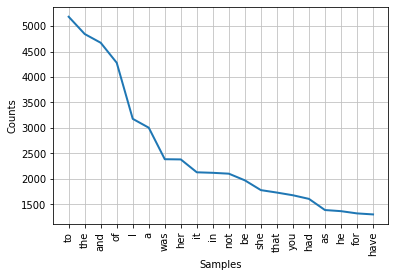

In [14]:
text.plot(20)
plt.show()

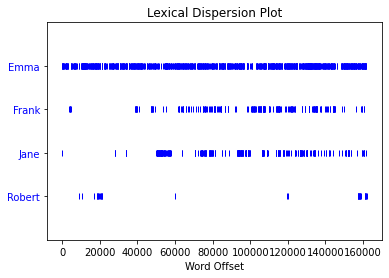

In [15]:
text.dispersion_plot(
    [
     "Emma",
     "Frank",
     "Jane",
     "Robert"
    ]
)

In [16]:
text.concordance("Robert")

Displaying 25 of 32 matches:
eye sufficiently acquainted with Mr Robert Martin His appearance was very neat
he girl who could be gratified by a Robert Martin s riding about the country t
 to me I could not have visited Mrs Robert Martin of Abbey Mill Farm Now I am 
from a most unexceptionable quarter Robert Martin is the man Her visit to Abbe
hear better sense from any one than Robert Martin He always speaks to the purp
eaning of this Harriet Smith refuse Robert Martin madness if it is so but I ho
cation to any connexion higher than Robert Martin She is the natural daughter 
end will deny She is superior to Mr Robert Martin Whoever might be her parents
een no friend to Harriet Smith Emma Robert Martin would never have proceeded s
e came to be revealed Let her marry Robert Martin and she is safe respectable 
ry But as to my _letting_ her marry Robert Martin it is impossible she has ref
 ever was talked cried Mr Knightley Robert Martin s manners have sense sinceri
hts appeared at last in

In [17]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [18]:
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [19]:
# 5-2. FreqDist

fd=text.vocab()

type(fd)

nltk.probability.FreqDist

In [20]:
# 사람의 이름만 모아서 사용빈도를 저장

from nltk import FreqDist

stopwords=["Mr.","Mrs.","Miss","Mr","Mrs","Dear" ]

emma_tokens=pos_tag(retokenize.tokenize(emma_raw))

names_list=[
   t[0] for t in emma_tokens if t[1]=="NNP" and t[0] not in stopwords
]

fd_names=FreqDist(names_list)

In [21]:
# 단어를 키, 출현빈도를 값

fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [22]:
# 가장 출현 빈도가 높은 단어를 조회
fd_names.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

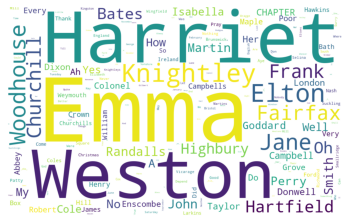

In [23]:
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wc=WordCloud(
    width=1024,
    height=640,
    background_color="white",
    random_state=0
)

plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

# 실습과제 모범 답안

구글 웹 브라우저에서 아래 내용을 스크래핑 워드클라우드를 만드시오(모양은 본인 마음대로).
프로그램은 이곳에 넣고 실행결과는 화면 캡쳐하여 프로그램 넣은 뒤에 붙여넣기 하시오. ➀ 2021 신년사를 검색하여 1번째로 나오는 정책뉴스의 2021년 신년사의 내용을 스크래핑 하시오.

자연어 처리 패키지 
가. NLTK(Natural Language Toolkit) 말뭉치(corpus) 토큰 생성 형태소 분석 품사 태깅

나. KoNLPy 한국어 처리 패키지 말뭉치 형태소 분석/품사 태깅-Hannanum, Kkma, Komoran, Mecab, Open Korean Text ...

!pip3 install konlpy

In [25]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.2'

In [28]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [29]:
chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

url='https://www.google.com'

driver.get(url)

In [30]:
target=driver.find_element_by_class_name('gLFyf')
target.send_keys('신년사')
target.send_keys(Keys.ENTER)

In [31]:
target=driver.find_element_by_class_name('LC20lb')
target.click()

In [32]:
gnb_menus = driver.find_elements_by_css_selector('#container > div > article > div.article-content > div.view-cont')
print(gnb_menus[0].text)
nya=gnb_menus[0].text

문재인 대통령이 11일 청와대에서 신년사를 하고 있다. (사진=저작권자(c) 연합뉴스, 무단 전재-재배포 금지)
존경하는 국민 여러분,
신축년 새해를 맞았습니다.
희망을 기원하면서도 마음이 무겁습니다.
새해가 새해 같지 않다는 말이 실감납니다.
코로나와의 기나긴 전쟁이 끝나지 않았습니다.
생명과 안전이 여전히 위협받고, 유례없는 민생경제의 어려움이 지속되고 있습니다.
일상의 상실로 겪는 아픔도 계속되고 있습니다.
고난의 시기를 건너고 계신 국민들께 깊은 위로의 말씀을 드립니다.
그러나 새해는 분명히 다른 해가 될 것입니다.
우리는 함께 코로나를 이겨낼 것입니다.
2021년은 우리 국민에게 ‘회복의 해’, ‘포용의 해’, ‘도약의 해’가 될 것입니다.
국민 여러분,
2020년, 신종감염병이 인류의 생명을 위협했고, 일상은 송두리째 바뀌었습니다.
우리 또한 예외가 아니었습니다.
세계 경제도 대공황 이후 최악의 침체를 겪었습니다.
우리 경제 역시 마이너스 성장을 면치 못했습니다.
모두가 어렵고 힘들었습니다.
국민들은 일 년 내내 불편을 감수해야 했습니다.
그러나 우리는 꺾이지 않았습니다.
위기 속에서 대한민국은 오히려 빛났습니다.
의료진들은 헌신적으로 환자를 돌봤고 국민들은 스스로 방역의 주체가 되었습니다.
우리 국민들은 이웃의 안전이 곧 나의 안전이라는 지극히 평범한 진실을, 놀라운 실천으로 전 세계에 보여주었습니다.
국민들이 자발적으로 구상한 창의적인 방역 조치들은 신속하게 현장에 적용되었습니다.
한국의 진단키트와 ‘드라이브 스루’ 검사방법과 마스크 같은 방역 물품들은 세계 각국에 보급되어, 인류를 코로나로부터 지키는데 크게 기여했습니다.
‘K-방역’은 국민 한 사람 한 사람의 헌신과 희생 위에 세워진 것입니다.
세계 최초로 전국 단위 선거와 입시를 치러냈고, 봉쇄 없이 확산을 최대한 억제하며, OECD 국가 중에서도 손꼽히는 방역 모범국가가 된 것은, 우리 국민들이 만들어 낸, 누구도 깎아내릴 수 없는 소중한 성과입니다.
우리 국민들의 상생 정신은 경제 위기를

!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk1.8.0_281" -- 운영플랫폼에 맞춰 처리한다

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter

In [35]:
t=Twitter()
tokens_ko=t.nouns(nya)
stop_words=['그','것','살','다만','해','로','중','등','의','또','더','포','재','위','과','속','음','이제','이','안','원']
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]
tokens_ko

['문재인',
 '대통령',
 '청와대',
 '신년사',
 '사진',
 '저작권',
 '연합뉴스',
 '무단',
 '배포',
 '금지',
 '존경',
 '국민',
 '여러분',
 '신축년',
 '새해',
 '희망',
 '기원',
 '마음',
 '새해',
 '새해',
 '말',
 '실감',
 '코로나',
 '전쟁',
 '생명',
 '안전',
 '위협',
 '유례',
 '민생',
 '경제',
 '어려움',
 '지속',
 '일상',
 '상실',
 '아픔',
 '계속',
 '고난',
 '시기',
 '국민',
 '위로',
 '말씀',
 '새해',
 '다른',
 '우리',
 '코로나',
 '낼',
 '우리',
 '국민',
 '회복',
 '용의',
 '도약',
 '국민',
 '여러분',
 '신종',
 '감염병',
 '인류',
 '생명',
 '위협',
 '일상',
 '송두리째',
 '우리',
 '또한',
 '예외',
 '세계',
 '경제',
 '대공황',
 '이후',
 '최악',
 '침체',
 '우리',
 '경제',
 '역시',
 '마이너스',
 '성장',
 '면치',
 '모두',
 '국민',
 '일',
 '년',
 '내내',
 '불편',
 '감수',
 '우리',
 '위기',
 '대한민국',
 '오히려',
 '의료',
 '진',
 '헌신',
 '환자',
 '국민',
 '스스로',
 '방역',
 '주체',
 '우리',
 '국민',
 '이웃',
 '안전',
 '곧',
 '나',
 '안전',
 '진실',
 '실천',
 '전',
 '세계',
 '국민',
 '자발',
 '구상',
 '창의',
 '방역',
 '조치',
 '현장',
 '적용',
 '한국',
 '진단',
 '키트',
 '드라이브',
 '스루',
 '검사',
 '방법',
 '마스크',
 '방역',
 '물품',
 '세계',
 '각국',
 '보급',
 '인류',
 '코로나',
 '로부터',
 '크게',
 '기여',
 '방역',
 '은',
 '국민',
 '사람',
 '사람',
 '헌신',
 '희생',
 '세계',
 '최초',
 

In [36]:
from PIL import Image
import numpy as np

In [37]:
data2=Counter(tokens_ko).most_common(100)
temp_data=dict(data2)
# https://hangeul.naver.com/font
mask_image=np.array(Image.open('bigStudy/sunflower.jpg'))
wordcloud2=WordCloud(font_path='NanumBarunGothic.ttf',relative_scaling=0,background_color='white',mask=mask_image,colormap='Spectral').generate_from_frequencies(temp_data)

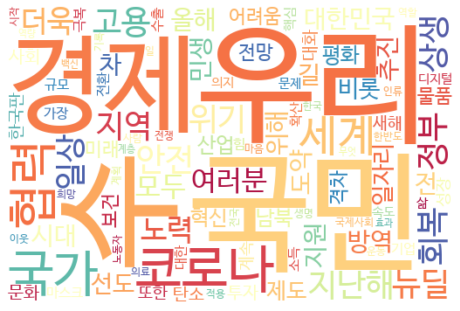

In [38]:
plt.figure(figsize=(8,20))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.show()

# iris 데이터 셋 정규화 해보기


###  데이터 불러오기

In [39]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [41]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### 1. 표준화

In [42]:
# 원래 데이터들의 평균과 분산 확인 
print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

=========== 표준화 ==============

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


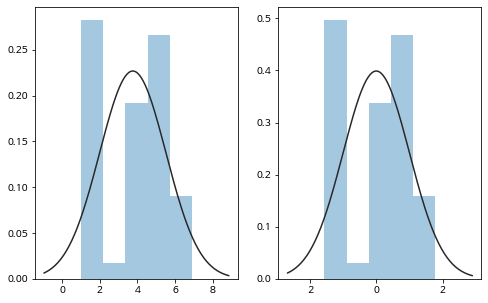

In [43]:
# 각 값들의 정규 분포 모양 비교
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포 
x0 = iris_df['petal length (cm)'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포 
x1 = iris_df_scaled['petal length (cm)'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
plt.show()

### 2.이상치 발견 및 제거과정


In [44]:
# check Z score 
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in iris_df_scaled.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(iris_df_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", iris_df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list,[])
iris_df_scaled = iris_df_scaled.drop(all_outlier_idx)
print("After (drop outlier)", iris_df_scaled.shape)

Check sepal length (cm)
sepal length (cm) Has outliers
 105    2.128516
117    2.249683
118    2.249683
122    2.249683
131    2.492019
135    2.249683
Name: sepal length (cm)_Zscore, dtype: float64

Check sepal width (cm)
sepal width (cm) Has outliers
 14    2.169988
15    3.090775
32    2.400185
33    2.630382
60   -2.433947
Name: sepal width (cm)_Zscore, dtype: float64

Check petal length (cm)
petal length (cm) Has Not outlier

Check petal width (cm)
petal width (cm) Has Not outlier

Before (150, 4)
After (drop outlier) (139, 4)


### 3. 정규화 작업 


In [45]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
